# Sioux Falls

In [10]:
import os
from pprint import pp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import bcnetwork as bc

## Loading graph

In [3]:
data_dir = '../instances/sioux-falls/'
nodes_file = os.path.join(data_dir, 'nodes.csv')
arcs_file = os.path.join(data_dir, 'arcs.csv')
odpairs_file = os.path.join(data_dir, 'origin_destination.csv')

## Solve Sioux-Falls instance

The "official" instance consist of 22 pares origen-destino, took from previous work "Bike network design problem with a path-size logit-based equilibrium constraint: Formulation, global optimization, and matheuristic".

The rest of the parameters that have to be set are:
- amount of infrastructures considering the base infrastructure.
- breakpoints: pairs of (improvement percentage, demand transfer percentage)
- budget: absolute amount or percentage of total buildable.

In [5]:
infrastructure_count = 4
breakpoints = [
    (0.95, 0.1),
    (0.87, 0.2),
    (0.85, 0.31),
    (0.80, 1.0),
]
budget_factor = 0.2

default_kwargs = dict(
    name='Sioux-Falls',
    nodes_file=nodes_file,
    arcs_file=arcs_file,
    odpairs_file=odpairs_file,
    infrastructure_count=infrastructure_count,
    breakpoints=breakpoints,
    budget_factor=budget_factor,
)

base_model = bc.model.Model(**default_kwargs)

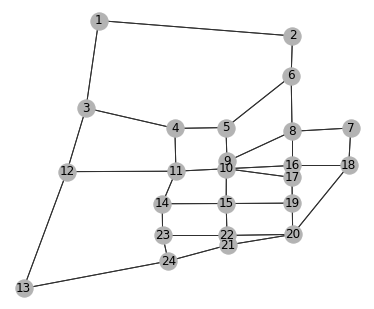

In [7]:
bc.draw.draw(base_model)

## Budget factor perturbation

- Vary budget factor from 0.01 to 0.5 in 20 steps

In [ ]:
budget_factors = np.linspace(0.001, 0.5, num=20)

budget_factors_solutions = []
print('budget, run_time_seconds, total_demand_transfered')
for budget_factor in budget_factors:
    model = bc.model.Model(**{**default_kwargs, 'budget_factor': budget_factor})
    solution = model.solve(solver='cbc')
    print(','.join(map(str, [model.budget, solution.run_time_seconds, solution.total_demand_transfered])))
    budget_factors_solutions.append(solution)

budget, run_time_seconds, total_demand_transfered
0.314,0.426604,198
8.560631578947369,1.522359,198
16.807263157894738,2.775204,198


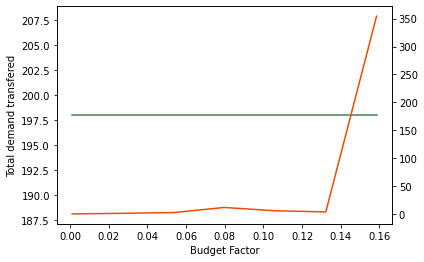

In [18]:
fig, ax = plt.subplots()
ax.set_ylabel('Total demand transfered')
ax.set_xlabel('Budget Factor')

ax2 = ax.twinx()

ax.plot(budget_factors[:7], [s.total_demand_transfered for s in budget_factors_solutions], color=bc.colors.green)
ax2.plot(budget_factors[:7], [s.run_time_seconds for s in budget_factors_solutions], color=bc.colors.orange)

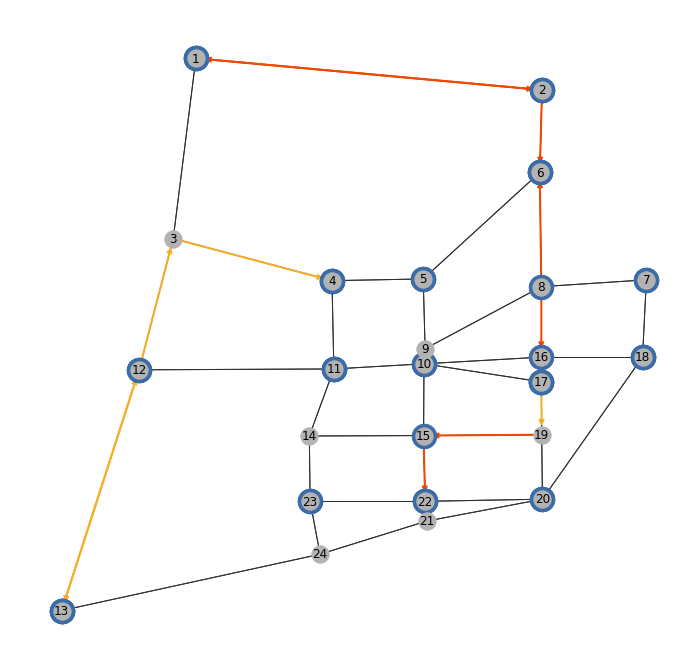

In [6]:
bc.draw.draw(model, solution=solution, figsize=(12, 12))

In [19]:
[s.total_demand_transfered for s in budget_factors_solutions]


[198, 198, 198, 198, 198, 198, 198]